# First Jupyter-Notebook
This notebook serves to test some first functionalities, i would like to test splitting data into chunk.
To see if different bitrates of data with the same sample rate changes the length of a numerical array.

### Slice audio files
Take the raw audio-  and noise files to cut them into pieces with 5 sec duration, will be stored in ```/use_data/processed/```
and ```/noise_data/processed/```.

_Note_: First 8 sec of all use_data will be removed, cause it provides unnecessary information.

In [1]:
from sample import loadData, calculation

loadData.sliceAudio(loadData.DATA_RAW,loadData.DATA_PRO)
loadData.sliceAudio(loadData.NOISE_RAW,loadData.NOISE_PRO)

# TODO: maybe concatenate the last pieces

usage_0.wav got sliced into 27 pieces and exported
Duration of last chunk is 0.38 sec file will be ignored
------------------------------------------------------------
usage_1.wav got sliced into 21 pieces and exported
Duration of last chunk is 1.72 sec file will be ignored
------------------------------------------------------------
usage_2.wav got sliced into 27 pieces and exported
Duration of last chunk is 0.4 sec file will be ignored
------------------------------------------------------------
aircon_2.wav got sliced into 2 pieces and exported
Duration of last chunk is 3.838 sec file will be ignored
------------------------------------------------------------
aircon_4.wav got sliced into 7 pieces and exported
Duration of last chunk is 2.209 sec file will be ignored
------------------------------------------------------------
aircon_5.wav got sliced into 7 pieces and exported
Duration of last chunk is 0.955 sec file will be ignored
---------------------------------------------------

In [2]:
# check created data
duration_use = loadData.getDuration(loadData.DATA_PRO)
duration_noise = loadData.getDuration(loadData.NOISE_PRO)
print("use audio files: %s" % len(duration_use))
print("noise audio files: %d" % len(duration_noise))

use audio files: 72
noise audio files: 102


In [3]:
import librosa as lr

# check the length of array for different bitrate
# aircon_2_0: bitrate 705kbps - usage_0_0: bitrate 1411kbps

audio_test, sr = lr.load(loadData.DATA_PRO+"usage_0_1.wav")
noise_test, n_sr = lr.load(loadData.NOISE_PRO+"aircon_2_0.wav")

print("noise:: length = %s sample rate = %s" %(len(noise_test),n_sr))
print("audio:: length = %s sample rate = %s" %(len(audio_test),sr))

noise:: length = 110250 sample rate = 22050
audio:: length = 110250 sample rate = 22050


In [4]:
import IPython.display as ipd

print("Sound of noise")
ipd.Audio(loadData.NOISE_PRO+"aircon_2_0.wav")

Sound of noise


In [5]:
print("Sound of audio")
ipd.Audio(loadData.DATA_PRO+"usage_0_1.wav")

Sound of audio


Text(0.5, 1.0, 'Audio chunk')

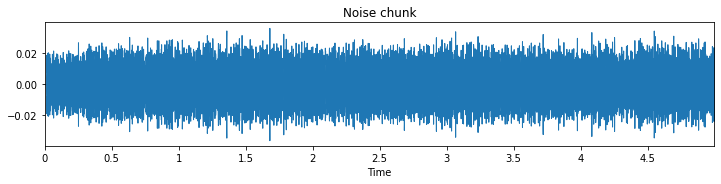

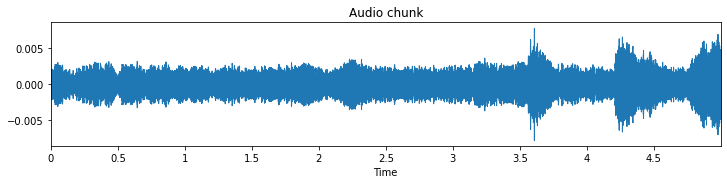

In [6]:
import matplotlib.pyplot as plt
import librosa.display

# Plots
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
lr.display.waveplot(noise_test,sr = n_sr)
plt.title("Noise chunk")

plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
lr.display.waveplot(audio_test,sr=sr)
plt.title("Audio chunk")

In [7]:
# Lets calculate the mean power and signal to noise ratio of both audio pieces
power_s = calculation.meanPower(audio_test)
power_n = calculation.meanPower(noise_test)
snr = calculation.snr(power_s,power_n)

print("RMS audio: \t\t%s W" % power_s)
print("RMS noise: \t\t%s W" % power_n)

print("signal to noise ratio: %s" % snr)

RMS audio: 		2.6951511e-06 W
RMS noise: 		8.269925e-05 W
signal to noise ratio: -14.869184494018555


In [8]:
import soundfile as sf
noisy_signal = noise_test+audio_test

path = "/home/timo/Musik/noisy_test_signal.wav"
sf.write(path,noisy_signal,loadData.SAMPLE_RATE)

print("noisy_sound with SNR = %s " % snr)
ipd.Audio(path)

noisy_sound with SNR = -14.869184494018555 


Text(0.5, 1.0, 'snr = -14.869184494018555')

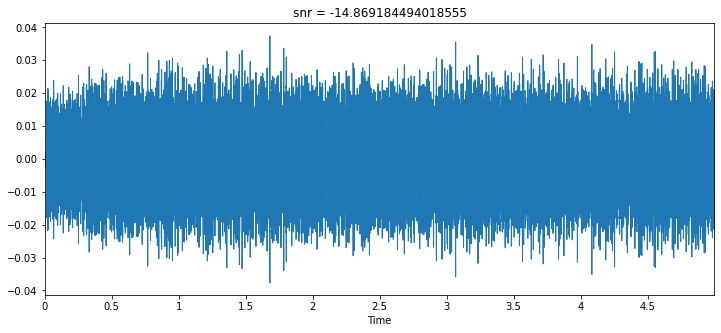

In [9]:
plt.figure(figsize=(12,5))
lr.display.waveplot(noisy_signal,sr = sr)
plt.title("snr = %s"%snr)

This does not sound pretty well, noise of the signal is pretty intense. Lets try to increase the
signal to noise ratio to try to reduce the noise.

In [10]:
# calculate the constant
a = calculation.constant(power_s,power_n,20)
print("factor= %s" %a)

# Multiply factor with audio signal
noise_test = noise_test/a
power_n = calculation.meanPower(noise_test)
snr_n = calculation.snr(power_s,power_n)

print("new snr = %s" %snr_n)

factor= 3068.445644287715
new snr = 54.869184494018555


In [11]:
noisy_signal = noise_test+audio_test

path = "/home/timo/Musik/noisy_test_signal.wav"
sf.write(path,noisy_signal,loadData.SAMPLE_RATE)

print("noisy_sound with SNR = %s " % snr_n)
ipd.Audio(path)
#wrong calculation but less noise

noisy_sound with SNR = 54.869184494018555 


Text(0.5, 1.0, 'snr = 54.869184494018555')

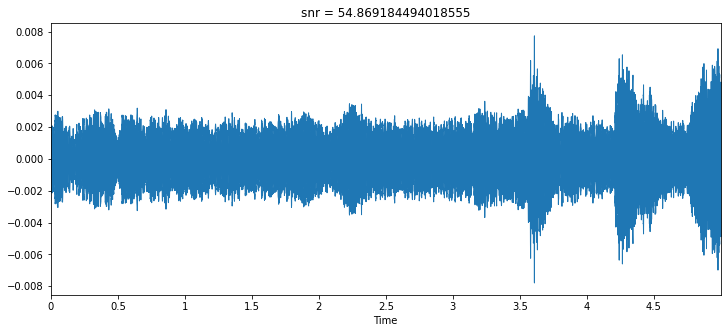

In [12]:
plt.figure(figsize=(12,5))
lr.display.waveplot(noisy_signal,sr = sr)
plt.title("snr = %s"%snr_n)
